In [56]:
import random
import numpy as np
from sklearn.preprocessing import StandardScaler
import function
import matplotlib.pyplot as plt
import math

In [57]:
X_1_or,X_2_or,y_or=function.gene_data(p_1=50,p_2=50,n=100,r_J=1,r_1=1,r_2=1,r_prop=1.0,w_J=1.0,w_1=1.0,w_2=1.0,X1_erro=0.001,X2_erro=0.001,y_erro=0.001)

In [59]:
X_1_tes,X_2_tes,y_tes=function.gene_data(p_1=50,p_2=50,n=10,r_J=10,r_1=10,r_2=10,r_prop=1.0,w_J=1.0,w_1=1.0,w_2=1.0,X1_erro=0.001,X2_erro=0.001,y_erro=0.001)

In [61]:
eta=0.5
r_J=20
r_1=20
r_2=20
times=100

In [62]:
erro_lis,number_best,erro_best,S_J_best,U_1_best,U_2_best,theta_1_best,S_1_best,W_1_best,theta_21_best,S_2_best,W_2_best,theta_22_best,hat_X_y_best=function.sJIVE(
    eta,times,r_J,r_1,r_2,X_1_or=X_1_or,X_2_or=X_2_or,y_or=y_or)


In [63]:
erro_lis

[2968.207309246234,
 2870.2111650416196,
 2869.498560738418,
 2869.7428832969445,
 2870.5127878171265,
 2871.059117357985,
 1.7131749657888278]

<function matplotlib.pyplot.show(close=None, block=None)>

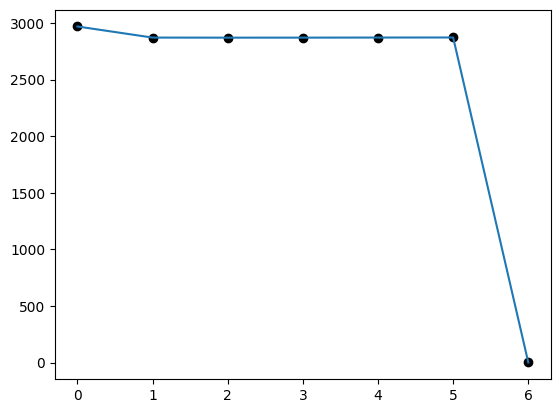

In [64]:
plt.plot(erro_lis)
plt.scatter(range(len(erro_lis)),erro_lis,color="black")
plt.show

In [81]:
n_tes=X_1_tes.shape[1]
times_tes=1000
erro_tes_best=1000
threshold_tes=10.0


In [82]:
erro_tes_lis=[]
U_1_hat=U_1_best
U_2_hat=U_2_best
U_hat=np.row_stack((U_1_hat,U_2_hat))

W_1_hat=W_1_best
W_2_hat=W_2_best
W_hat=np.row_stack((W_1_hat,W_2_hat))

theta_1_hat=theta_1_best
theta_21_hat=theta_21_best
theta_22_hat=theta_22_best

X_new=np.row_stack((X_1_tes,X_2_tes))

S_J_new=np.random.uniform(low=-0.1, high=0.1, size=(r_J,n_tes))
S_1_new=np.random.uniform(low=-0.1, high=0.1, size=(r_1,n_tes))
S_2_new=np.random.uniform(low=-0.1, high=0.1, size=(r_2,n_tes))


In [83]:
U_hat.T.dot(U_hat)

array([[ 9.99896429e-01,  1.80391834e-03, -2.45322788e-04,
         8.80320176e-05, -9.03521285e-03,  2.74800672e-04,
        -6.87199617e-04, -1.10419716e-03,  1.19214488e-04,
        -1.32649681e-03,  3.17407860e-04, -1.22147499e-03,
        -8.41073118e-04, -2.69112893e-04, -7.47455835e-04,
        -9.08242780e-04, -1.22196415e-03, -8.92346249e-05,
         1.63021481e-04,  7.97378620e-04],
       [ 1.80391834e-03,  9.68580673e-01,  4.27285242e-03,
        -1.53327713e-03,  1.57368712e-01, -4.78627660e-03,
         1.19691390e-02,  1.92320964e-02, -2.07639054e-03,
         2.31039487e-02, -5.52837735e-03,  2.12747557e-02,
         1.46491948e-02,  4.68721104e-03,  1.30186376e-02,
         1.58191067e-02,  2.12832755e-02,  1.55422326e-03,
        -2.83938862e-03, -1.38881561e-02],
       [-2.45322788e-04,  4.27285242e-03,  9.99418916e-01,
         2.08517099e-04, -2.14012631e-02,  6.50906801e-04,
        -1.62773584e-03, -2.61545736e-03,  2.82377480e-04,
        -3.14200757e-03,  7.5

In [84]:
#推定
W_1_S_1_new=W_1_hat.dot(S_1_new)
W_2_S_2_new=W_2_hat.dot(S_2_new)
W_S_new=np.row_stack((W_1_S_1_new,W_2_S_2_new))

S_J_new=U_hat.T.dot(X_new-W_S_new)

#推定値を計算
hat_X_1_tes=U_1_hat.dot(S_J_new)+W_1_hat.dot(S_1_new)
hat_X_2_tes=U_2_hat.dot(S_J_new)+W_2_hat.dot(S_2_new)
hat_X_tes=np.row_stack((hat_X_1_tes,hat_X_2_tes))

#誤差を計算
erro_tes=np.linalg.norm(X_1_tes-hat_X_1_tes)**2+np.linalg.norm(X_2_tes-hat_X_2_tes)**2
erro_tes_lis.append(erro_tes)
erro_tes

779.0575301528115

In [85]:
for j in range(times_tes):
    #推定
    W_1_S_1_new=W_1_hat.dot(S_1_new)
    W_2_S_2_new=W_2_hat.dot(S_2_new)
    W_S_new=np.row_stack((W_1_S_1_new,W_2_S_2_new))

    S_J_new=U_hat.T.dot(X_new-W_S_new)

    #推定値を計算
    hat_X_1_tes=U_1_hat.dot(S_J_new)+W_1_hat.dot(S_1_new)
    hat_X_2_tes=U_2_hat.dot(S_J_new)+W_2_hat.dot(S_2_new)
    hat_X_tes=np.row_stack((hat_X_1_tes,hat_X_2_tes))

    #誤差を計算
    erro_tes=np.linalg.norm(X_1_tes-hat_X_1_tes)**2+np.linalg.norm(X_2_tes-hat_X_2_tes)**2
    erro_tes_lis.append(erro_tes)

    if erro_tes<erro_tes_best:
        number_tes_best=j
        erro_tes_best=erro_tes
        S_J_new_best=S_J_new
        S_1_new_best=S_1_new
        S_2_new_best=S_2_new

    if erro_tes<threshold_tes:
        break

    S_1_new=W_1_hat.T.dot(X_1_tes-U_1_hat.dot(S_J_new))

    #推定値を計算
    hat_X_1_tes=U_1_hat.dot(S_J_new)+W_1_hat.dot(S_1_new)
    hat_X_2_tes=U_2_hat.dot(S_J_new)+W_2_hat.dot(S_2_new)
    hat_X_tes=np.row_stack((hat_X_1_tes,hat_X_2_tes))
    
    #誤差を計算
    erro_tes=np.linalg.norm(X_1_tes-hat_X_1_tes)**2+np.linalg.norm(X_2_tes-hat_X_2_tes)**2
    erro_tes_lis.append(erro_tes)

    if erro_tes<erro_tes_best:
        number_tes_best=j
        erro_tes_best=erro_tes
        S_J_new_best=S_J_new
        S_1_new_best=S_1_new
        S_2_new_best=S_2_new

    if erro_tes<threshold_tes:
        break


    S_2_new=W_2_hat.T.dot(X_2_tes-U_2_hat.dot(S_J_new))
    #推定値を計算
    hat_X_1_tes=U_1_hat.dot(S_J_new)+W_1_hat.dot(S_1_new)
    hat_X_2_tes=U_2_hat.dot(S_J_new)+W_2_hat.dot(S_2_new)
    hat_X_tes=np.row_stack((hat_X_1_tes,hat_X_2_tes))

    #誤差を計算
    erro_tes=np.linalg.norm(X_1_tes-hat_X_1_tes)**2+np.linalg.norm(X_2_tes-hat_X_2_tes)**2
    erro_tes_lis.append(erro_tes)

    if erro_tes<erro_tes_best:
        number_tes_best=j
        erro_tes_best=erro_tes
        S_J_new_best=S_J_new
        S_1_new_best=S_1_new
        S_2_new_best=S_2_new

    if erro_tes<threshold_tes:
        break
        







In [86]:
erro_tes_lis

[779.0575301528115,
 779.0575301528115,
 639.5627596059674,
 482.2277656203697,
 459.5222096974022,
 452.08518307702514,
 445.2197955131296,
 436.3859970882339,
 433.3738406045874,
 429.70296531698193,
 424.9479422678694,
 423.2409417994678,
 420.96444495618096,
 417.8515411974479,
 416.6843497816209,
 415.12778841184274,
 412.8699684498787,
 412.0000361552005,
 410.85891216235825,
 409.1243287004569,
 408.4474958570356,
 407.5654765324573,
 406.1813387336675,
 405.64013966483316,
 404.92958947875894,
 403.79305125086773,
 403.35091961112926,
 402.759464615572,
 401.80435409219604,
 401.4363854918113,
 400.93110239350074,
 400.1127484775367,
 399.8013903983793,
 399.36068606633467,
 398.6478986648481,
 398.3805101688532,
 397.9896905977591,
 397.3601050417685,
 397.1274244975476,
 396.7761595343234,
 396.21337212729077,
 396.0085069109043,
 395.6893211914936,
 395.1810572859458,
 394.9988008627772,
 394.7061441219148,
 394.24305238180705,
 394.07941525313083,
 393.80907162973097,
 393.

<function matplotlib.pyplot.show(close=None, block=None)>

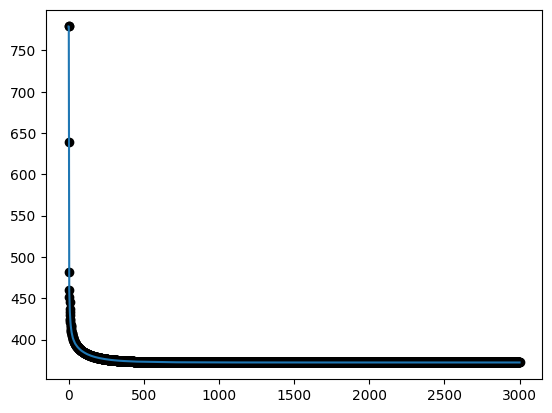

In [87]:
plt.plot(erro_tes_lis)
plt.scatter(range(len(erro_tes_lis)),erro_tes_lis,color="black")
plt.show

In [88]:
y_new=theta_1_hat.dot(S_J_new_best)+theta_21_hat.dot(S_1_new_best)+theta_22_hat.dot(S_2_new_best)

In [89]:
erro_result=np.linalg.norm(y_tes-y_new)**2
erro_result

12.045585742854762